## **STAGE 1: PROBLEM DEFINITION**

In [1]:
# ==============================
# Stage 1: Problem Definition
# ==============================
#Final Model

# ---- Problem Type ----
PROBLEM_TYPE = "Traffic Sign Recognition and Classification"

# ---- Dataset Info ----
DATASET_NAME = "GTSRB - German Traffic Sign Recognition Benchmark"
NUM_CLASSES = 43
CLASS_LABELS = list(range(NUM_CLASSES))
IMG_SIZE = 32
IMG_DIMENSION = (32,32,3)
# ---- Input / Output ----
INPUT_TYPE = "RGB Image"
OUTPUT_TYPE = "Class Label (0–42)"

# ---- Image Properties (assumptions, confirmed in EDA) ----
IMAGE_CHANNELS = 3   # RGB

# ---- Evaluation Metrics ----
PRIMARY_METRIC = "Accuracy"
SECONDARY_METRICS = ["Confusion Matrix", "F1-score"]

# ---- Model Variants ----
MODELS_PLANNED = {
    "Model_A": "CNN from Scratch",
    "Model_B": "Transfer Learning (ResNet / VGG)",
    "Model_C": "Transfer Learning (MobileNet / EfficientNet)"
}

# ---- Print summary (for notebook clarity) ----
print("Problem Definition Summary")
print("-" * 40)
print(f"Problem Type      : {PROBLEM_TYPE}")
print(f"Dataset           : {DATASET_NAME}")
print(f"Number of Classes : {NUM_CLASSES}")
print(f"Input             : {INPUT_TYPE}")
print(f"Output            : {OUTPUT_TYPE}")
print(f"Primary Metric    : {PRIMARY_METRIC}")
print(f"Other Metrics     : {', '.join(SECONDARY_METRICS)}")
print("\nPlanned Models:")
for k, v in MODELS_PLANNED.items():
    print(f"  {k} -> {v}")


Problem Definition Summary
----------------------------------------
Problem Type      : Traffic Sign Recognition and Classification
Dataset           : GTSRB - German Traffic Sign Recognition Benchmark
Number of Classes : 43
Input             : RGB Image
Output            : Class Label (0–42)
Primary Metric    : Accuracy
Other Metrics     : Confusion Matrix, F1-score

Planned Models:
  Model_A -> CNN from Scratch
  Model_B -> Transfer Learning (ResNet / VGG)
  Model_C -> Transfer Learning (MobileNet / EfficientNet)


# **STAGE 2: DATA INGESTION**
This stage includes following steps:
1. Loads images from the locally stored folder [Not from google drive or Keggle]
2. Read Image Paths and Labels
3. Create Structured Dataset
4. Spliting of data set into Train, Validation and Test (Stratified)
5. Test data check

**2.1: Read Image Paths and Labels from Dataset present in the Kaggle Dataset "gtsrb-german-traffic-sign"**

In [2]:
import os
DATASET_PATH = "/kaggle/input/gtsrb-german-traffic-sign"

TRAIN_DATA = f"{DATASET_PATH}/Train"
image_paths = []
labels = []

for folder_class_name in os.listdir(TRAIN_DATA):            #folder_class_name = 0 1 2 ..... 42
    class_dir = os.path.join(TRAIN_DATA, folder_class_name) #content/gtsrb/Train\0 1 2 . .... 42

    #Check if the path exixts. If not the skip it and go for next folder_class_name
    if not os.path.isdir(class_dir):
        continue

    for img_file in os.listdir(class_dir):
        full_path = os.path.join(class_dir, img_file)       #content/gtsrb/Train\0 1 2....42\00000_00000_00000.png... 0001234
        image_paths.append(full_path)
        labels.append(int(folder_class_name))


**2.2: Create Structured Dataset**  
Points to be noted:  
* For each image map it to a label using pandas dataframe

In [3]:
#!pip install pandas
import pandas as pd

data_df = pd.DataFrame(
  {
    "image_path": image_paths,
    "label": labels
  }
)
print("Total Images: "+str(len(data_df.image_path)))
print("Total Labels: "+str(len(data_df["label"] .unique())))

Total Images: 39209
Total Labels: 43


**2.3 Spliting of data set into Train, Validation and Test (Stratified)**  
Points to be noted:
* Random state (42-> Can be any number, but should be same) should be of same number each time
* Using Stratified appraoach with 'labels' to proportinally split the data from each class (0 1 2...42)

In [4]:
#!pip install scikit-learn

from sklearn.model_selection import train_test_split

# Here the entire data is split into training data = 80% and Test data = 20%
# This complete test data will be split again into test data and validation test data
train_data_df, valtest_data_df = train_test_split(
    data_df,
    test_size=0.35,
    stratify = data_df['label'],
    random_state = 42
)



**2.4: Test data check**

In [5]:
print("Train:", len(train_data_df))
print("Val  :", len(valtest_data_df))

Train: 25485
Val  : 13724


# **STAGE 3: DATA EXPLORATION (EDA)**  
This stage includes the following steps:  
1. Class distribution, to know the counts of images per class
2. Sample images per class, to know if images can retrived and contents of images. Also, to verify if everything is working properly
3. Image sizes, to know if the images have same height, width and length
4. Normalization needs, to know the range of pixel values

**3.1 Class distribution**  
To know the counts of images per class

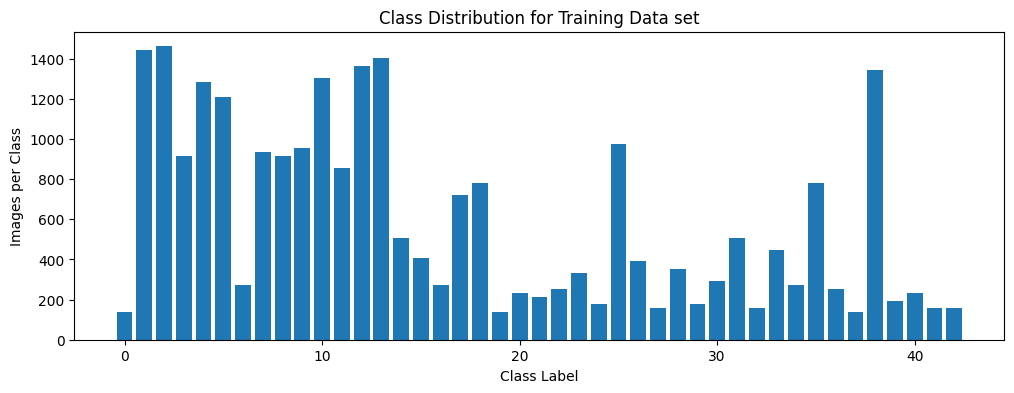

In [6]:
#!pip install matplotlib
import matplotlib.pyplot as plt

class_count = train_data_df['label'].value_counts().sort_index()

os.makedirs(r"/kaggle/working/outputs", exist_ok=True)


plt.figure(figsize=(12, 4))
plt.bar(class_count.index, class_count.values)
plt.xlabel("Class Label")
plt.ylabel("Images per Class")
plt.title("Class Distribution for Training Data set")
plt.savefig(r"/kaggle/working/outputs/Class_Distribution_for_Training_Data_set.pdf", dpi=300) 
plt.show()

**3.2 Sample images per class**  
To know if images can retrived and contents of images. Also, to verify if everything is working properly

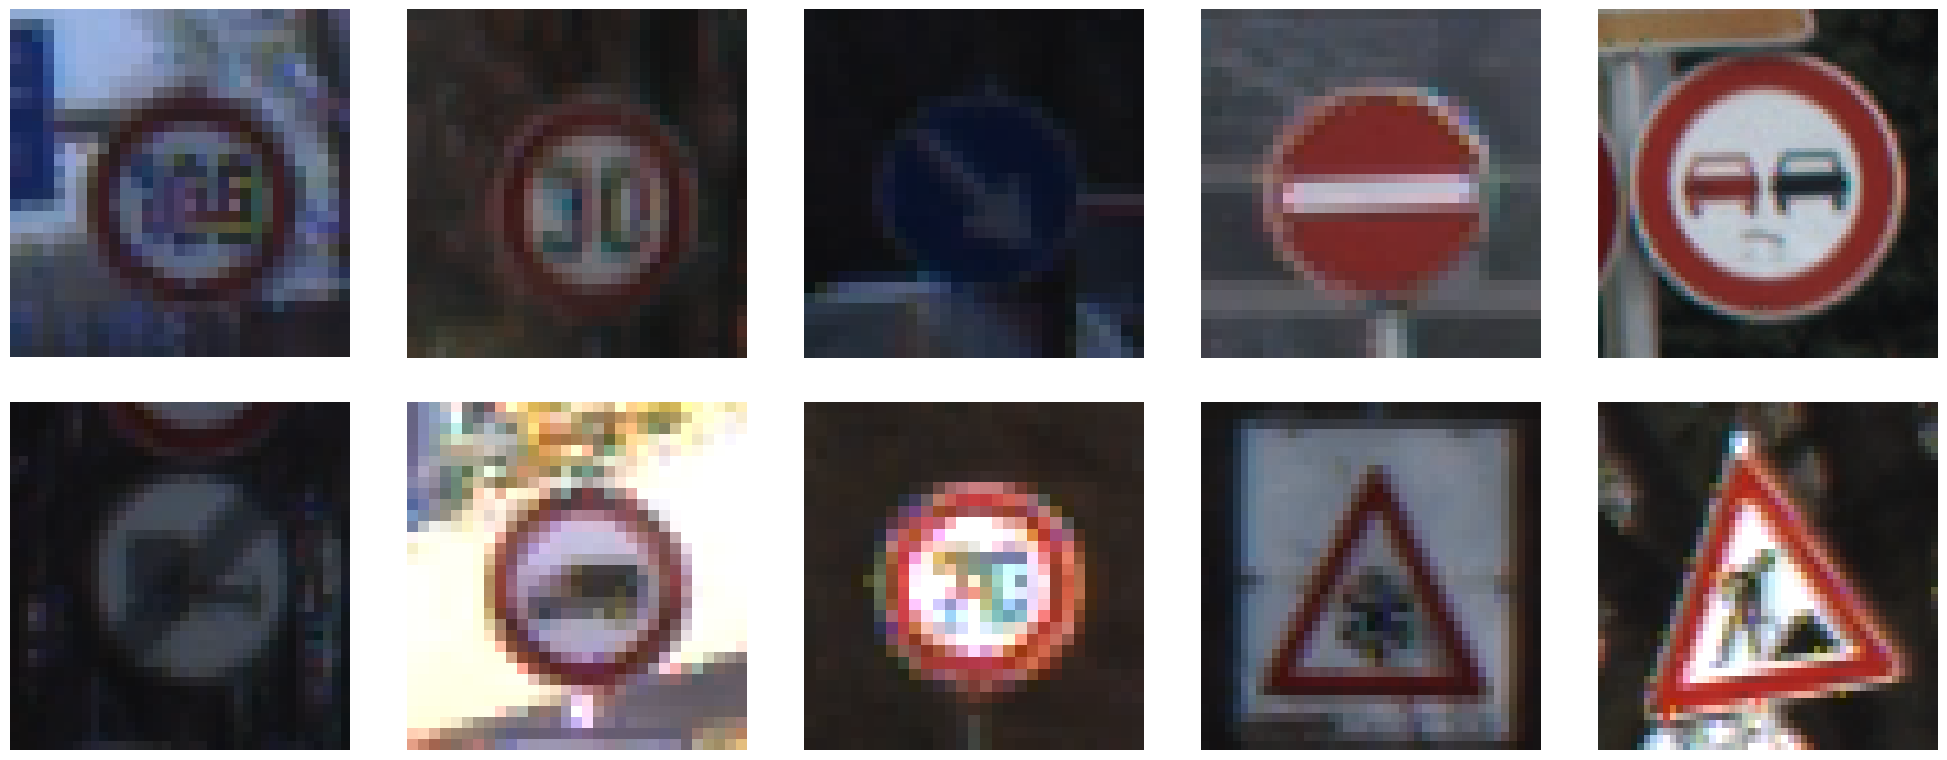

In [7]:
#!pip install opencv-python
#!pip install numpy
import cv2
import numpy as np

sample_classes = train_data_df['label'].unique()[15:25]

images_samples = []

# Here the grid is created with the size 20x8.
# Note: if this changed to other values then the images are not fit in the frame
fig,axes = plt.subplots(2,5, figsize = (20,8))
plt.tight_layout()

for index,sample in enumerate(sample_classes):
    # Take the label which are equal to the sample. Then, take the first image path of it
    img = train_data_df[train_data_df['label'] == sample]['image_path'].iloc[0]
    # Read the image present in the path img
    img_cv = cv2.imread(img)
    # Convert from BGR to RGB format
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Place the img_cv at the proper plot pf 2x5 grid
    axes[index//5, index%5].imshow(img_cv, aspect = 'auto')
    axes[index//5, index%5].axis('off')
plt.savefig(r"/kaggle/working/outputs/Sample_Images_Used.pdf", dpi=300) 

**3.3 Image sizes**  
To know if the images have same height, width and length

and

**3.4 Normalization need check**  
To know the range of pixel values which checks if normalization is required or not

In [8]:
image_sizes = []
image_pixels_mins = []
image_pixels_maxs = []


for img_path in train_data_df['image_path']:
    img = cv2.imread(img_path)

    # img_details returns height x width x channel
    image_sizes.append(img.shape)

    image_pixels_mins.append(img.min())
    image_pixels_maxs.append(img.max())

#-------------------------  3.3 Image sizes  --------------------------#
# Convert the images_size in numpy array
np_img = np.array(image_sizes)
print("The details about the images are:")
print("Minimum Height    :  "+str(np_img[:,0].min()))
print("Maximum Height    :  "+str(np_img[:,0].max()))
print("Minimum Width     :  "+str(np_img[:,1].min()))
print("Maximum Width     :  "+str(np_img[:,1].max()))
print("Minimum Channels  :  "+str(np_img[:,2].min()))
print("Maximum Channels  :  "+str(np_img[:,2].max()))
print("Heights and widths vary implies that resize is required")
print("Channels should be 3 which says that the images are RGB format")

#-------------------------  3.4 Normalization need check  --------------------------#
print()
print("The pixel values of all the images collectively considered")
print("Minimum Pixel Value: "+str(min(image_pixels_mins)))
print("Maximum Pixel Value: "+str(max(image_pixels_maxs)))
print("The range shoould be from 0 to 255")

The details about the images are:
Minimum Height    :  25
Maximum Height    :  225
Minimum Width     :  25
Maximum Width     :  243
Minimum Channels  :  3
Maximum Channels  :  3
Heights and widths vary implies that resize is required
Channels should be 3 which says that the images are RGB format

The pixel values of all the images collectively considered
Minimum Pixel Value: 0
Maximum Pixel Value: 255
The range shoould be from 0 to 255


# **STAGE 4: DATA PREPROCESSING**  
4.1 Resize images  
4.2 Normalize pixel values  
4.3 One-hot encode labels  
4.4 Data augmentation (training only)  

Original Image -> resize -> normalize -> one-hot encode -> Augmentation -> packaged for CNN

**4.1 Resize images**
Here the input should be of fixed-size, the images should not be of different sizes


In [9]:
def load_and_resize_image(img_path):
    # Load the image
    img = cv2.imread(img_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {img_path}")

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the size to 32x32
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    return img

def load_and_resize_image_ResNet50(img_path):
    # Load the image
    img = cv2.imread(img_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {img_path}")

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the size to 32x32
    img = cv2.resize(img, (128,128))

    return img


**4.2 Normalize pixel values**  
Here the img which of type for example [244, 12, 85] are convereted to [0.176 0.263 0.349]  
Normalization is done to make all the pixel numbers small for faster learning


In [10]:
def normalize_image(img):
    # Conver the pixels from (0 - 255) to (0.0 - 1.0)
    return img / 255.0

**4.3 One-hot encode labels**  

In [11]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 6.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
google-cloud-translate 3.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.29.5 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.
pydrive2

In [12]:
#!pip install -U protobuf==3.20.3
import tensorflow
from tensorflow.keras.utils import to_categorical

def encode_label(label):
    return to_categorical(label, NUM_CLASSES)

**Merging all helper function as per below mentioned pipeline**  
Original Image -> resize -> normalize -> one-hot encode -> Augmentation -> packaged for CNN
  
Row index | image_path                    | label  

0         | content/gtsrb/.../00001.png   | 2  
1         | content/gtsrb/.../00002.png   | 5  
2         | content/gtsrb/.../00003.png   | 0  
...  
6708      | content/gtsrb/.../00012.png   | 12  

In [13]:
def prepare_images(dataframe_df, agumentor= None):
  resized_normalized_img = []
  resized_labels = []
  for img_index_path_tuple in dataframe_df.iterrows():
    # When the numpy data frame is row iterated, the output is the a tuple of
    # (index, row_series). row_series = label = image_path content/gtsrb/Train\12\00012_00031_00018.png
    # label 12  Name: 6708, dtype: object
    # hence to access image path [1] should be used

    # Access the image path
    df_img_path = img_index_path_tuple[1]['image_path']

    # Provide the image path to resize the path
    img = load_and_resize_image(df_img_path)

    # Normalize the image
    img = normalize_image(img)

    # Place all the ready images into a list
    resized_normalized_img.append(img)
    resized_labels.append(img_index_path_tuple[1]['label'])

  processed_images = np.array(resized_normalized_img)
  processed_labels = encode_label(resized_labels)

  # This is used when agumenation is required. Which is used with Train data.
  if agumentor:
    return agumentor.flow(processed_images, processed_labels, batch_size = 32)
  return processed_images, processed_labels

# **STAGE 5: Model Development**  

## Model A: CNN from Scratch
1. The Architecture of CNN flow is as given below:  
Image -> [Conv → ReLU → Pool]*N -> Flatten -> Fully Connected -> Output

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2. Build the custom model

In [15]:
def custom_cnn():
    # 1. Define the model
    model = Sequential()

    # 2. Image Input details:
    # IMG_DIMENSION = (32,3,3) and NUM_CLASSES = 43 (Refer to the STAGE 1)

    # 3. [Conv → ReLU → Pool]*N Part
    # 3.1 Conv block 1
    model.add(Conv2D(32,(3,3),activation='relu',padding= 'same', input_shape = IMG_DIMENSION))
    model.add(MaxPooling2D((2,2)))

    # 3.2 Conv block 2
    model.add(Conv2D(64,(3,3),activation='relu',padding= 'same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))

    # 3.3 Conv block 3
    model.add(Conv2D(128,(3,3),activation='relu',padding= 'same'))
    model.add(MaxPooling2D((2,2)))

    # 4. Flatten
    model.add(Flatten())

    # Fully connected layers
    # 6. Dense
    model.add(Dense(128,activation='relu'))

    # 7. Drop
    model.add(Dropout(0.5))

    # 8. Output
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model

3. Function to stop the epochs when the model is not increasing its accuracy

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

4. Compile the model with adam optimizer and categorocal cross entropy which is used when one hot encoding is used

In [17]:
model_cnn = custom_cnn()

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Prepare the images (dataset) and labels for the images (dataset)

In [18]:
train_images, train_labels = prepare_images(train_data_df)
val_images, val_labels = prepare_images(valtest_data_df)


6. Train the model "model_cnn"

In [19]:

history = model_cnn.fit(
    train_images,      # Generator of augmented training images
    train_labels,
    validation_data=(val_images,val_labels),  # Validation images (no augmentation)
    epochs=20,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/20


I0000 00:00:1767463249.982383      87 service.cc:148] XLA service 0x7ba6a400bb50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767463249.982915      87 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767463249.982933      87 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767463250.284840      87 cuda_dnn.cc:529] Loaded cuDNN version 90300


 53/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0523 - loss: 3.6799

I0000 00:00:1767463253.507890      87 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


797/797 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1524 - loss: 3.1500 - val_accuracy: 0.5264 - val_loss: 1.4862
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4887 - loss: 1.5583 - val_accuracy: 0.8186 - val_loss: 0.6260
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6824 - loss: 0.9281 - val_accuracy: 0.9375 - val_loss: 0.2854
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8018 - loss: 0.5929 - val_accuracy: 0.9690 - val_loss: 0.1458
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8624 - loss: 0.4151 - val_accuracy: 0.9800 - val_loss: 0.0956
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8969 - loss: 0.3124 - val_accuracy: 0.9844 - val_loss: 0.0679
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9195 - loss: 0.2411 - val_accuracy: 0.9894 - val_loss: 0.0485
Epoch 8/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9365 - loss: 0.1994 - val_accuracy: 0.9923 - val

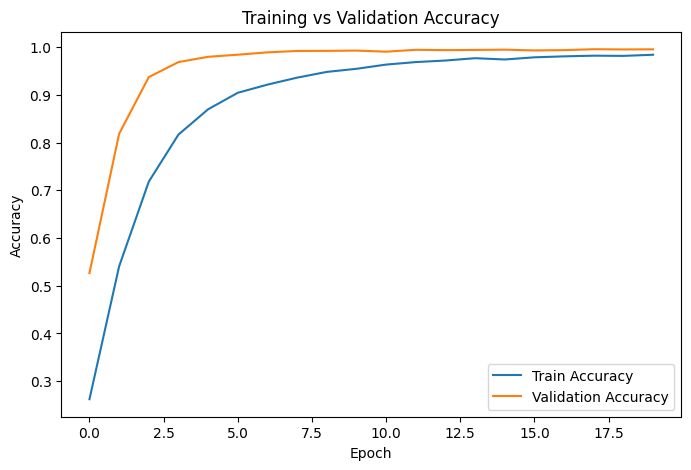

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.savefig(r"/kaggle/working/outputs/Training_vs_Validation_Accuracy_custom_cnn.pdf", dpi=300)
plt.show()

Save the model

In [21]:
os.makedirs(r"/kaggle/working/models/weights/custom_cnn", exist_ok=True)
os.makedirs(r"/kaggle/working//models/complete_models/custom_cnn", exist_ok=True)


# Save only weights
model_cnn.save_weights(r"/kaggle/working/models/weights/custom_cnn/custom_cnn_model_weights.weights.h5")

# Or save the full model (architecture + weights + optimizer)
model_cnn.save(r"/kaggle/working/models/complete_models/custom_cnn/custom_cnn_model.h5")


## Model B: Transfer Learning: ResNet 50
1. The Architecture and flow of ResNet50 is as shown below:  
Input (32×32×3)  
↓  
ResNet50 convolution backbone (pretrained ImageNet weights)  
↓  
GlobalAveragePooling  
↓  
Dense (128 neurons)
↓
Dropout (0.5)  
↓  
Dense(43: To match the total number of classes)

In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

2. Load the ResNet50 backbone

In [23]:
base_model = ResNet50(
    weights = 'imagenet',
    input_shape = (128,128,3),
    include_top = False            # Since the image dimensions are 32x32 and ResNet50 needs 224x224
)

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Add layers on top of ResNet50 model to make it compatibale to this project

In [24]:

# Take the output [Feature maps] of the base ResNet50 Model
x = base_model.output

# Conver the feature maps to single vector
x = GlobalAveragePooling2D()(x)

# Dense the vector to 64
x = Dense(64, activation='relu')(x)

# Drop 50% of the 256 neurons
x = Dropout(0.5)(x)

output = Dense(43, activation='softmax')(x)

for trainable_layer in base_model.layers[-10:]:
    trainable_layer.trainable = True


4. Create a final model

In [25]:
ResNet50_model = Model(
    inputs = base_model.input,
    outputs = output
)

5. Compile the model

In [26]:
ResNet50_model.compile(
    optimizer = Adam(learning_rate=1e-4),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

6. Training the model

In [27]:
def prepare_image_generator(dataframe_df, gen_batch_size = 32):
    while True:
        for start in range(0, len(dataframe_df), gen_batch_size):
            images = []
            labels = []
            batch_df = dataframe_df[start:start+gen_batch_size]

            '''for image_index_tuple in batch_df.iterrows():

              image_index_tuple[0] = index = 31367
              image_index_tuple[1] =
              31367
              image_path    content/gtsrb/Train\12\00012_00031_00018.png
              label                                                   12
              Name: 6708, dtype: object

              image_index_tuple[1]['image_path'] = content/gtsrb/Train\12\00012_00031_00018.png
              image_index_tuple[1]['lable'] = 12
              '''
            for index, row in batch_df.iterrows():

              if row['image_path'] is None or row['image_path'] == '':
                  continue
              if row['label'] == None:
                  continue

              df_img_path = row['image_path']
              df_img_label = row['label']

              img = load_and_resize_image_ResNet50(df_img_path)

              if img is None:
                 continue

              img = normalize_image(img)

              images.append(img)
              labels.append(df_img_label)

            if len(images) > 0:
                gen_images = np.array(images)
                gen_labels = encode_label(labels)
                yield gen_images, gen_labels

Preparing the batches of train images since the images are of higher size

In [28]:
gen_batch_size = 32

train_images_generator = prepare_image_generator(train_data_df, gen_batch_size)
validation_image_generator = prepare_image_generator(valtest_data_df, gen_batch_size)

gen_steps_per_epoch = (len(train_data_df) // gen_batch_size)
val_steps = (len(valtest_data_df) // gen_batch_size)

In [29]:
history = ResNet50_model.fit(
    train_images_generator,
    validation_data = validation_image_generator,

    steps_per_epoch = gen_steps_per_epoch,
    validation_steps = val_steps,

    epochs = 25
)

Epoch 1/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.1809 - loss: 3.1801 - val_accuracy: 0.4252 - val_loss: 2.1892
Epoch 2/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - accuracy: 0.4525 - loss: 2.0136 - val_accuracy: 0.5433 - val_loss: 1.5976
Epoch 3/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.5740 - loss: 1.5251 - val_accuracy: 0.5817 - val_loss: 1.4820
Epoch 4/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 63s 79ms/step - accuracy: 0.6446 - loss: 1.2450 - val_accuracy: 0.6933 - val_loss: 1.0582
Epoch 5/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.7029 - loss: 1.0276 - val_accuracy: 0.6914 - val_loss: 1.0587
Epoch 6/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.7359 - loss: 0.9068 - val_accuracy: 0.7466 - val_loss: 0.8170
Epoch 7/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.7692 - loss: 0.7978 - val_accuracy: 0.7393 - val_loss: 0.8529
Epoch 8/25
796/796 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.7912 - loss: 0.7261 - 

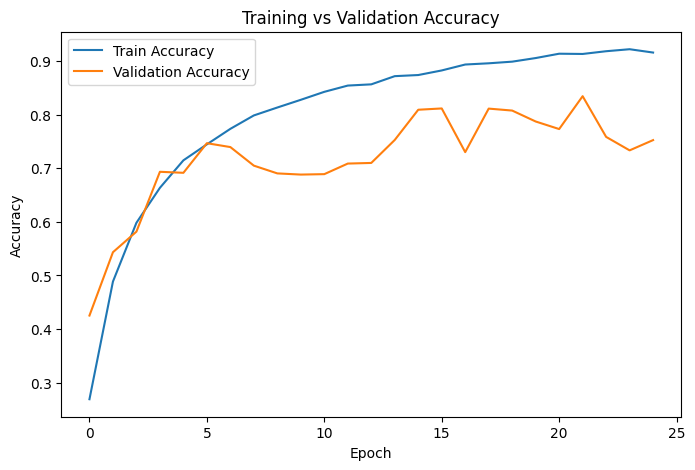

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.savefig(r"/kaggle/working/outputs/Training_vs_Validation_Accuracy_resnet50.pdf", dpi=300)
plt.show()

Save the model

In [31]:
import os
os.makedirs(r"/kaggle/working/models/weights/resnet50", exist_ok=True)
os.makedirs(r"/kaggle/working/models/complete_models/resnet50", exist_ok=True)


# Save only weights
ResNet50_model.save_weights(r"/kaggle/working/models/weights/resnet50/resnet50_weights.weights.h5")

# Or save the full model (architecture + weights + optimizer)
ResNet50_model.save(r"/kaggle/working/models/complete_models/resnet50/resnet50_model.h5")
